<a href="https://colab.research.google.com/github/kiryu-3/prosa/blob/main/Python/Python_DS/DS_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas



## Pandasとは


**Pandas**とは、データの操作・解析を目的として作られたライブラリです。  
Numpyを中で使っており、またNumpyと並んで最重要なものになります。

![リンクテキスト](https://imgur.com/8fxE9Bv.png)

データサイエンスの分野では、多くの場合データを表形式で扱います。  
特に表形式でのデータ処理が得意なPandasは、データサイエンスには欠かせないものです。

GoogleColabやJupyter Labといった環境下では、最初から入っているため改めて入れる必要はありません。  
自分で入れる場合は`conda install pandas`や`pip install pandas`という記述をします。


pandasをimportする際、`pd`とするのが一般的です。

In [5]:
import pandas as pd

Numpyも同時に使うことが多いので、importしてしまいましょう。  

また今回扱うデータの関係で、Seabornのimportも必要です。

In [6]:
import numpy as np
import seaborn as sns

## Series



**Series**とは、表形式のデータの各行やカラムを切り取ったデータを表すデータ形式です。  

|Name|Sex|Age|
|---|---|---|
|Chitose|female|35|
|Hokudai|male|105|
|Muroran|male|74|

上の表を例とすると、表の一番上に並んでいるものを**ヘッダー**、  
ヘッダーを構成している1つ1つの要素を**カラム**といいます。  
また、表の1行1行を**レコード**といいます。



この表から各行・各列を切り取ったものがSeriesです。

ますはSeriesのオブジェクトを作ってみましょう。  
**`pd.Series()`**とすると作ることができます。

In [7]:
# dictionraryからSeriesを作る

data = {
    "Name" : "Chitose",
    "Sex" : "female",
    "Age" : "35"
}

pd.Series(data)

Name    Chitose
Sex      female
Age          35
dtype: object

左に見える "Name","Sex","Age" は、Seriesのインデックスです。  
表を横に切った場合にはカラムになります。

In [8]:
#ndarrayからSeriesを作る

array = np.array([35,105,74])
pd.Series(array)

0     35
1    105
2     74
dtype: int64

ndarrayからSeriesを作った場合には、Seriesのインデックスは連番の数値になります。
表を縦に切った場合と同じです。

引数**index**をつけることで、インデックスにラベルを指定することができます。

In [9]:
array = np.array([35,105,74])
pd.Series(array,index=["Chitose","Hokudai","Muroran"])

Chitose     35
Hokudai    105
Muroran     74
dtype: int64

特定のラベルを指定して値を取り出すことができます。

In [10]:
age = pd.Series(array,index=["Chitose","Hokudai","Muroran"])
age["Chitose"]

35

**`.values`**とすることで、値をnumpyとして扱うことが可能になります。

In [11]:
age.values

array([ 35, 105,  74])

また、numpyと同じように統計量を計算することもできます。



In [12]:
age.sum()

214

（DataFrameで統計量を求める方法は[こちら](https://3pysci.com/python-pandas-7/#index_id0)を参考にしてください。）

Seriesに関しては[こちら](https://3pysci.com/python-pandas-28/)にも詳しい話があります。

## DataFrame


Seriesが集まったデータ構造が**DataFrame**です。  
データサイエンスのほとんどの作業において使われます。最重要です。


### pd.DataFrame()


**`pd.DataFrame()`**とするとDataframeのオブジェクトを作ることができます。

まずはndarrayからDaraFrameを作成してみましょう。  
（[こちら](https://3pysci.com/python-pandas-18/#index_id8)ではさらに詳しい解説がありますので、良ければ参考にしてください。）

In [13]:
# ndarrayからDataFrameを作る

ndarray = np.arange(1,11).reshape(2,5)
pd.DataFrame(ndarray)

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,10


この場合は、カラムが列の番号、インデックスが行の番号になっています。  

この状態であると不便であるので、引数**`columns`**と**`index`**を指定することがあります。  
`index`は指定しないことが多いですが、`columns`は何らかの**文字列**を指定することが多いです。

In [14]:
pd.DataFrame(ndarray, index={"index1","index2"},  
             columns={'columns1','columns2','columns3','columns4','columns5'})

,columns5,columns4,columns1,columns2,columns3
index2,1,2,3,4,5
index1,6,7,8,9,10


dictionaryから作ることもできます。  
（[こちら](https://bit.ly/3dw8Rte)ではさらに詳しい解説がありますので、良ければ参考にしてください。）   

dictionaryのリストをいれると，それがそのままDataFrameになります。  
それぞれのdictionaryが同じキーを持つ必要があります。

In [15]:
# dictionraryからDataFrameを作る

data1 = {
    "Name" : "Chitose",
    "Sex" : "female",
    "Age" : 35
}

data2 = {
    "Name" : "Hokudai",
    "Sex" : "male",
    "Age" : 105
}

data3 = {
    "Name" : "Muroran",
    "Sex" : "male",
    "Age" : 74
}

pd.DataFrame([data1,data2,data3])

,Name,Sex,Age
0,Chitose,female,35
1,Hokudai,male,105
2,Muroran,male,74


同じキーを毎回書くことは、データ数が増えた場合を考えるととても面倒です。  

dictionaryの各Valueをリストにしてしまうことが一般的です。


In [16]:
data = {
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
    "Age":[35,105,74]
}

pd.DataFrame(data)

,name,sex,Age
0,Chitose,female,35
1,Hokudai,male,105
2,Muroran,male,74


DataFrameを変数に入れる際は、**`df`**という変数に入れることが一般的です。  
メモリを節約するために、`df`という変数名を使う場面が多いです。

### pd.read_csv()
最も多いのがCSVファイルからDataFrameを読み込む方法です。  
指定のCSVファイルをColabにアップロードして、**`pd.read_csv()`**を用いて読み込んでみましょう。

In [17]:
df = pd.read_csv("train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


引数`encoding`を指定しないと、日本語が文字化けしてしまう場合があります。  

エラーが出てしまう場合は文字コードの指定を試してみてください。

In [18]:
df = pd.read_csv("train.csv", encoding="SHIFT-JIS")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


（[こちら](https://bit.ly/3RZlICW)ではさらに詳しい解説がありますので、良ければ参考にしてください。）

## DataFrameの基本操作


今回は先ほど読み込んだCSVファイルではなく、  
モジュールSeabornのデータセットを利用します。

In [19]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


タイタニック号沈没事故の乗客の生存者/死亡者のデータセットです。  
（[Kaggleのデータセット](https://www.kaggle.com/c/titanic/data)と似ていますが、若干の違いがあります。）

読み込んだ`df`を使って、基本操作について学んでいきましょう。

### len()
まずは`df`の行数を確認してみましょう。

In [20]:
len(df)

891

### pd.set_option("display.max_columns",None)
カラムは数が多い場合は省略されてしまうことがあります。  
columnsを省略したくない場合は **`pd.set_option("display.max_columns",None)`**を使いましょう。  

※ちなみに行を省略したくない場合は **`pd.set_option("display.max_rows",None)`**を使いますが、  
結構時間がかかりあまり使う場面はありません。

In [21]:
pd.set_option("display.max_columns",None)  # 今回は元々省略されていない

### .head()
**`.head()`**と記述し、最初の5レコードだけ表示することが多いです。  
カッコの中に数字を入れると、その行数表示されます。


In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


[こちら](https://bit.ly/3f4vHs2)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### .dtypes()
**`.dtypes()`**と記述すると、各項目のデータ型を確認できます。

In [23]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

以下のコードでは全項目をオブジェクト型にしています。  
CSVファイルを読み込むときも容量は同じです。

In [24]:
df = sns.load_dataset('titanic',dtype=object)
df.dtypes

survived         object
pclass           object
sex              object
age              object
sibsp            object
parch            object
fare             object
embarked         object
class          category
who              object
adult_male       object
deck           category
embark_town      object
alive            object
alone            object
dtype: object

### .describe()
**`.describe()`**と記述すると、columnsの統計量がすぐに出力されます（数値項目のみ）。  

それぞれのデータの意味を掴みやすくなります。


In [25]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,714,891,891,891,889,891,891,891,203,889,891,891
unique,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
top,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True
freq,549,491,577,30,608,678,43,644,491,537,537,59,644,549,537


* count：要素の個数  
* unique：ユニークな値の要素の個数
* top：最頻値  
* freq：最頻値の出現回数

ちなみにこの`.describe()`の戻り値もDataFrameなので、  
これ自体をDataFrameとして扱うことが可能です。

In [26]:
type(df.describe())

pandas.core.frame.DataFrame

### .columns
DataFrameが持つ全てのカラムのリストを取得することができます。  
カラムが多いときに活躍します。

In [27]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

各カラムの説明は[こちら](https://bit.ly/3Sb53x9)を参照してください。

また、`.columns`に関しては[こちら](https://bit.ly/3YErIoj)により詳しい解説があります。

### 列の取得
**`df["カラム名"]`**とすることで、特定のカラムのSeriesを取得することができます。

In [155]:
df["age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

カラムのリストをブラケット[ ]に入れることで、複数のカラムを抽出できます。  
戻り値はDataFrameになります。

In [29]:
df[["survived","sex","age"]].head(3)

,survived,sex,age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0


[こちら](https://3pysci.com/python-pandas-4/)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### 行の取得
**`df.iloc[index]`**とすることで、特定の行のSeriesを取得することができます。

In [30]:
df.iloc[334]

survived                 1
pclass                   1
sex                 female
age                    NaN
sibsp                    1
parch                    0
fare                133.65
embarked                 S
class                First
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                  yes
alone                False
Name: 334, dtype: object

In [31]:
df.iloc[-1]

survived                0
pclass                  3
sex                  male
age                  32.0
sibsp                   0
parch                   0
fare                 7.75
embarked                Q
class               Third
who                   man
adult_male           True
deck                  NaN
embark_town    Queenstown
alive                  no
alone                True
Name: 890, dtype: object

Numpyと同様、スライスを使うことで複数行取得することができます。

In [32]:
df.iloc[330:335]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
330,1,3,female,NaN,2,0,23.25,Q,Third,woman,False,NaN,Queenstown,yes,False
331,0,1,male,45.5,0,0,28.5,S,First,man,True,C,Southampton,no,True
332,0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
333,0,3,male,16.0,2,0,18.0,S,Third,man,True,NaN,Southampton,no,False
334,1,1,female,NaN,1,0,133.65,S,First,woman,False,NaN,Southampton,yes,False


今回のデータはcolumnsが文字列、indexが数値でした（この場合がほとんどです）。

次に行と列が逆である場合を考えてみましょう。


In [33]:
ndarray = np.arange(1,26).reshape(5,5)
index = ['a','b','c','d','e']
columns = [0,1,2,3,4]
df = pd.DataFrame(ndarray,index=index,columns=columns)
df

,0,1,2,3,4
a,1,2,3,4,5
b,6,7,8,9,10
c,11,12,13,14,15
d,16,17,18,19,20
e,21,22,23,24,25


indexが文字列である場合に行を取得する際は、**`df.loc[文字列]`**と記述します。

In [34]:
print(df[1])  # 列を取得

a     2
b     7
c    12
d    17
e    22
Name: 1, dtype: int64


In [35]:
print(df.loc["c"])  # 行を取得

0    11
1    12
2    13
3    14
4    15
Name: c, dtype: int64


[こちら](https://3pysci.com/python-pandas-3/#index_id5)や[こちら](https://bit.ly/3DC3ymw)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### columnsの更新・追加
同じインデックスを持った別の値のSeriesを代入することで、  
columnsの更新・追加が可能になります。

In [36]:
s = pd.Series([10,60,110,160,210],index=['a','b','c','d','e'])
df[0]

a     1
b     6
c    11
d    16
e    21
Name: 0, dtype: int64

In [37]:
# columnsの更新
df[0] = s
df

,0,1,2,3,4
a,10,2,3,4,5
b,60,7,8,9,10
c,110,12,13,14,15
d,160,17,18,19,20
e,210,22,23,24,25


In [38]:
# columnsの追加
df[5] = s
df

,0,1,2,3,4,5
a,10,2,3,4,5,10
b,60,7,8,9,10,60
c,110,12,13,14,15,110
d,160,17,18,19,20,160
e,210,22,23,24,25,210


[こちら](https://3pysci.com/python-pandas-8/)ではさらにいろいろな方法について触れています。

### 行名・列名の変更
行名や列名を変更することができます。

In [39]:
ndarray = np.arange(1,26).reshape(5,5)
index = ['a','b','c','d','e']
columns = [0,1,2,3,4]
df = pd.DataFrame(ndarray,index=index,columns=columns)
df

,0,1,2,3,4
a,1,2,3,4,5
b,6,7,8,9,10
c,11,12,13,14,15
d,16,17,18,19,20
e,21,22,23,24,25


行名を全部変える場合は`.index`にリストを指定します。

In [40]:
df.index = [1, 2, 3, 4, 5]
df

,0,1,2,3,4
1,1,2,3,4,5
2,6,7,8,9,10
3,11,12,13,14,15
4,16,17,18,19,20
5,21,22,23,24,25


列名を全部変える場合は`.columns`にリストを指定します。

In [41]:
df.columns = ["a", "b", "c", "d", "e"]
df

,a,b,c,d,e
1,1,2,3,4,5
2,6,7,8,9,10
3,11,12,13,14,15
4,16,17,18,19,20
5,21,22,23,24,25


特定の行、列の名前を変更する場合は`.rename`を用います。

In [42]:
df = df.rename(index={1: 11} , columns={"a": "A"})
df

,A,b,c,d,e
11,1,2,3,4,5
2,6,7,8,9,10
3,11,12,13,14,15
4,16,17,18,19,20
5,21,22,23,24,25


### .drop()
指定したカラムや行を削除することができます。

In [43]:
df = sns.load_dataset('titanic')

引数axisで行を落とすか列を落とすか指定します。

`axis=0` : 行（デフォルト）  
`axis=1` : 列

In [44]:
df.drop(0).head(3)  # 0行目を落とす

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [45]:
df.drop("survived" , axis=1).head(3)  # survivedカラムを落とす

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


DataFrameの関数の多くは、**元のDataFrameが変更されていないことが多い**です。

In [46]:
df.head(3)  # 0行目やsurvivedカラムが落ちていない

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


元のdfを上書きしたい場合は、「**再度同じオブジェクトに代入**」することが多いです。  
以下のような理由があります。

・ぱっと見で分かる  
・データサイエンスではよく使う  
・同じメモリを使いまわすのが定石

In [47]:
df = df.drop(0)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


## DataFrameのフィルタ
DataFrameに対して、何か条件に合うレコードだけを抽出した  
新しいDataFrameを取得する際にフィルタ操作を行います。

In [48]:
data = {
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
    "Age":[35,105,74]
}

df = pd.DataFrame(data)
df

,name,sex,Age
0,Chitose,female,35
1,Hokudai,male,105
2,Muroran,male,74


### 特定の条件でフィルタ
まずはdfにbool型のリストを入れてみましょう。


In [49]:
df[[False,True,True]]

,name,sex,Age
1,Hokudai,male,105
2,Muroran,male,74


Seriesを入れることもできます。

In [50]:
filter_series = pd.Series([False,True,True])
df[filter_series] 

,name,sex,Age
1,Hokudai,male,105
2,Muroran,male,74


インデックスは新しく振られるのではなく、  
元のdfのインデックスがそのまま引き継がれます。

実際にはTrueやFalseのSeriesを比較演算子を使って自分で作ります。  
**`df[filterの条件]`**とすると、ある条件に該当したレコードだけが返ってきます。

In [51]:
df[df["Age"] < 100]

,name,sex,Age
0,Chitose,female,35
2,Muroran,male,74


In [52]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


生存者だけフィルタして取り出してみましょう。  
カラム`survived`の値が`1`であるという条件となります。

In [53]:
df[df["survived"] == 1].head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


生存したかの違いについてみることができるようになります。

In [54]:
df[df["survived"] == 1].describe()

,survived,pclass,age,sibsp,parch,fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [55]:
df[df["survived"] == 0].describe()

,survived,pclass,age,sibsp,parch,fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


生存したかによって、年齢の平均にそこまで差がないこと（28.3と30.6）が分かります。

複数条件でフィルタをすることも可能です。  
各条件を**()**で囲んで、**「&」**(andと同意)や**「|」**(orと同意)でつなぎます。

In [56]:
df[(df["survived"] == 1) & (df["sex"] == "male")].head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
17,1,2,male,NaN,0,0,13.0,S,Second,man,True,NaN,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5,S,First,man,True,A,Southampton,yes,True


生き残った男性は109名いたようです。

**「~」**を使うと、NOT演算をすることができます。

今回は、乗車する際に払う料金がゼロのレコードについて取得してみます。  

（このレコードの信頼性は微妙なところです）

In [57]:
df[(df["fare"] == 0)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True


このDataFrameの条件の前に**「~」**をつけると、  
乗車する際に払う料金がゼロではないレコードのみ取得することができます。  


In [58]:
# 乗車する際に払う料金がゼロではない

df[~(df["fare"] == 0)].head(3)  # 今回は比較演算子「!=」でも同じ

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


これは特に「**値がbool型のcolumnsでフィルタするとき**」によく使います。  
以下のDataFrameで考えてみましょう。

In [59]:
data = {
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
    "Age":[35,105,74],
    "Koritu":[True,False,False]
}

df = pd.DataFrame(data)
df

,name,sex,Age,Koritu
0,Chitose,female,35,True
1,Hokudai,male,105,False
2,Muroran,male,74,False


まずは公立化している大学だけフィルタしてみましょう。

In [60]:
df[df["Koritu"] == True]

,name,sex,Age,Koritu
0,Chitose,female,35,True


Korituカラム自体がすでにbool型なので、**==は不要です**。

In [61]:
df[df["Koritu"]]

,name,sex,Age,Koritu
0,Chitose,female,35,True


逆にFalseに絞りたい場合は、`df[df["Koritu"]==False]`とすることもなく、  
以下のようにすることができます。

In [62]:
df[~df["Koritu"]]

,name,sex,Age,Koritu
1,Hokudai,male,105,False
2,Muroran,male,74,False


### index操作


生存者だけフィルターしたDataFrameを基に説明します。

In [63]:
df = sns.load_dataset('titanic')
df = df[df["survived"] == 1]
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


**`.reset_index()`**とすることで、再度インデックスを割り振ることができます。

In [64]:
df.reset_index().head(3)

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


元のインデックスは新しいcolumnsで追加されていきます。  



元のインデックスは使わないケースが多いです。

**drop引数**をTrueにすると元のインデックスは消えます。

In [65]:
df.reset_index(drop=True).head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


**`.set_index()`**とすると、指定したcolumnsの値をインデックスにすることができます。

`id`などが各データに割り振られているときなどに使うことがあります。  

今回は新しく生成されたインデックスカラムをインデックスにします。

In [66]:
df = df.reset_index()
df = df.set_index("index")
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
index,,,,,,,,,,,,,,,
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


カラムをインデックスにした場合は、**`.loc[]`**を使ってレコードを取得します。

In [67]:
df.loc[334]

survived                 1
pclass                   1
sex                 female
age                    NaN
sibsp                    1
parch                    0
fare                133.65
embarked                 S
class                First
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                  yes
alone                False
Name: 334, dtype: object

インデックスはあまり意味を持たせず、数値の連番のままであることが多いです。

インデックスの操作は[こちら](https://bit.ly/3UoOZbV)にも詳しい解説があります。

## DataFrameのNaNの扱い


DataFrameのNaN（欠損値）についてみていきましょう。  
実データには必ずといっていいほどNaNが存在しますので、適切な処理が必要です。

[こちら](https://bit.ly/3f3wGsC)にはNaNの処理全般について紹介があるので、良ければ参考にしてください。

また、**「floatのエラーが出た時は欠損値が入っている可能性が高い」**ということを  
念頭に置いてください。**とても重要です**。

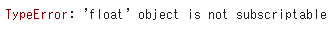

In [68]:
df = sns.load_dataset('titanic')
df.iloc[-1]["deck"]

nan

### .isnull()
それぞれのセルの値が欠損値NaNか確認します。

In [69]:
df.isnull().head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


TrueになっているところがNaNです。

### .isnull().sum()
NaNの数をカウントします。

In [70]:
df = sns.load_dataset('titanic')

In [71]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

乗車していたデッキの欠損値が目に見えて多いですね。

### .dropna()
NaNがある行を全てdropします。

In [72]:
df = sns.load_dataset('titanic')

In [73]:
drop_df = df.dropna()
len(drop_df)

182

半分以上のレコードがdropされたことが確認できました。

例えば、DataFrameの最終行はデッキカラムがNaNであったためにdropされています。

In [74]:
df.iloc[-1]

survived                0
pclass                  3
sex                  male
age                  32.0
sibsp                   0
parch                   0
fare                 7.75
embarked                Q
class               Third
who                   man
adult_male           True
deck                  NaN
embark_town    Queenstown
alive                  no
alone                True
Name: 890, dtype: object

In [75]:
drop_df.iloc[-1]

survived               1
pclass                 1
sex                 male
age                 26.0
sibsp                  0
parch                  0
fare                30.0
embarked               C
class              First
who                  man
adult_male          True
deck                   C
embark_town    Cherbourg
alive                yes
alone               True
Name: 889, dtype: object

次は何かカラムを指定してdropしてみましょう。  
※**`np.isnan()`を使えるのは数値項目のみ**

In [76]:
df[np.isnan(df["age"])].head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True


**引数subset**を指定すると、特定のカラムにNaNがあるレコードだけdropすることができます。

In [77]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [78]:
len(df.dropna(subset=["embarked"]))  # 2件drop

889

[こちら](https://3pysci.com/python-pandas-17/)や[こちら](https://bit.ly/3f4lTi3)では`.dropna`についてさらに詳しい紹介がされていますので、  
興味のある方は是非。

### .fillna()
NaNに特定のValueを代入します。



In [79]:
df = sns.load_dataset('titanic')

In [80]:
df["embarked"] = df["embarked"].fillna("S")
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

embarkedカラムに"S"(Southampton)が入り、  
欠損値が置き換えられたことが確認できます。

しかし実際は、NaNに一律の値を入れることはほとんどなく、  
何か代表値を入れることが多いです。



今回はカラム`runtime`が欠損値であったレコードに対し、何か欠損値を入れてみましょう。  
ここでは**平均値**を代入します。

In [81]:
df["age"].mean()

29.69911764705882

In [82]:
df["age"].fillna(df["age"].mean())  # ageカラムのNaNにだけ代入

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [83]:
print(df.iloc[334]["age"])
df["age"] = df["age"].fillna(df["age"].mean())  # 元のageカラムの値が上書きされる
print(df.iloc[334]["age"])

nan
29.69911764705882


### pd.isna()
DataFrameの中の値のNaN判定には**`pd.isna()`**を使うことが一般的です。

In [84]:
df = sns.load_dataset('titanic')

In [85]:
df["age"].isna()[334]  # 欠損値があるのでTrue

True

NaN判定の結果を別カラムで持ちたい時などに使われます。

In [86]:
df["age_nan"] = df["age"].isna()  # カラムの追加
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False


これをNaNのフィルタに使うこともできます。

In [87]:
df[df["age_nan"]].head(3)  # 年齢がNaNであるデータ

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_nan
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,True


## groupby
groupbyは、何かのカラムに対して、グループ別に統計量を見たいときによく使います。

In [88]:
df = sns.load_dataset('titanic')

今回はまずは「年代」のカラムを作り、その後groupbyして統計量を見てみましょう。

その際、欠損値は平均値で置き換えます。

In [89]:
df["age"] = df["age"].fillna(df["age"].mean())
df["ages"] = round(df['age'] / 10, 0) * 10
df["ages"]

0      20.0
1      40.0
2      30.0
3      40.0
4      40.0
       ... 
886    30.0
887    20.0
888    30.0
889    30.0
890    30.0
Name: ages, Length: 891, dtype: float64

カラム`ages`に対してgroupbyしてみましょう。  
groupbyした後の処理をgroupbyの後の関数で指定します。

In [90]:
# agesカラムごとにグループ分けして、そのグループの各カラムの平均値を取得
df.groupby("ages").mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
ages,,,,,,,,
0.0,0.704545,2.568182,2.503864,1.704545,1.363636,31.528030,0.000000,0.022727
10.0,0.411765,2.705882,10.102941,1.970588,1.264706,31.932724,0.000000,0.088235
20.0,0.354260,2.461883,20.706278,0.390135,0.313901,30.323057,0.623318,0.645740
30.0,0.349296,2.470423,29.764067,0.442254,0.183099,23.409963,0.687324,0.709859
40.0,0.424242,2.000000,39.306818,0.363636,0.560606,49.744948,0.613636,0.545455
50.0,0.409836,1.606557,49.704918,0.426230,0.262295,44.399390,0.672131,0.540984
60.0,0.352941,1.470588,59.750000,0.147059,0.323529,48.589579,0.705882,0.735294
70.0,0.000000,1.857143,70.357143,0.142857,0.142857,27.383343,1.000000,0.857143
80.0,1.000000,1.000000,80.000000,0.000000,0.000000,30.000000,1.000000,1.000000


In [91]:
# agesカラムごとにグループ分けして、そのグループのサイズを取得
df.groupby("ages").size()

ages
0.0      44
10.0     34
20.0    223
30.0    355
40.0    132
50.0     61
60.0     34
70.0      7
80.0      1
dtype: int64

In [92]:
# 10代のカラムのみ取得
df.groupby("ages").mean().loc[10]

survived       0.411765
pclass         2.705882
age           10.102941
sibsp          1.970588
parch          1.264706
fare          31.932724
adult_male     0.000000
alone          0.088235
Name: 10.0, dtype: float64

**`.count()`**を使うと、数をカウントしてくれます。

In [93]:
# 生存人数を年代ごとにカウント
df[df["survived"] == 1].groupby("ages").count() ["survived"]

ages
0.0      31
10.0     14
20.0     79
30.0    124
40.0     56
50.0     25
60.0     12
80.0      1
Name: survived, dtype: int64

In [94]:
# 死亡人数を年代ごとにカウント
df[df["survived"] == 0].groupby("ages").count() ["survived"]

ages
0.0      13
10.0     20
20.0    144
30.0    231
40.0     76
50.0     36
60.0     22
70.0      7
Name: survived, dtype: int64

**`.groupby[].describe()`**とすると、グループ別の各カラムの統計量を一気に取得できます。

In [95]:
# fareカラムに関して、agesカラムでgroupby後の統計量を取得
df.groupby("ages").describe()["fare"]

,count,mean,std,min,25%,50%,75%,max
ages,,,,,,,,
0.0,44.0,31.528030,29.434829,8.5167,18.237500,26.0000,31.38750,151.5500
10.0,34.0,31.932724,24.835287,7.2292,18.965625,28.5125,34.03125,120.0000
20.0,223.0,30.323057,50.638592,0.0000,7.795800,9.5000,26.00000,263.0000
30.0,355.0,23.409963,31.481249,0.0000,7.879200,12.3500,25.96250,227.5250
40.0,132.0,49.744948,84.420252,0.0000,9.271875,26.0000,52.13855,512.3292
50.0,61.0,44.399390,40.783592,0.0000,13.500000,28.7125,61.37920,247.5208
60.0,34.0,48.589579,53.835939,6.2375,14.125000,28.1250,71.93230,263.0000
70.0,7.0,27.383343,25.115268,7.7500,9.137500,10.5000,42.07920,71.0000
80.0,1.0,30.000000,NaN,30.0000,30.000000,30.0000,30.00000,30.0000


**max**と**min**を使用する際は、カラムを指定する必要があります。

In [96]:
# fareカラムに関して、agesカラムでgroupby後の最大値を取得
df.groupby("ages")["fare"].max()

ages
0.0     151.5500
10.0    120.0000
20.0    263.0000
30.0    227.5250
40.0    512.3292
50.0    247.5208
60.0    263.0000
70.0     71.0000
80.0     30.0000
Name: fare, dtype: float64

`max`のところを**`idxmax()`**とすると、各カラムの最大値のレコードのインデックスを取得できます。

In [97]:
df.groupby("ages")["fare"].idxmax()

ages
0.0     297
10.0    435
20.0     27
30.0    557
40.0    258
50.0    299
60.0    438
70.0    745
80.0    630
Name: fare, dtype: int64

このインデックスのSeriesを使って、レコードを表示してみましょう。  
非常に便利です。

In [98]:
# 年代ごとに、料金が最大であるレコードを取得
df.iloc[df.groupby("ages")["fare"].idxmax()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,ages
297,0,1,female,2.000000,1,2,151.5500,S,First,child,False,C,Southampton,no,False,0.0
435,1,1,female,14.000000,1,2,120.0000,S,First,child,False,B,Southampton,yes,False,10.0
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False,20.0
557,0,1,male,29.699118,0,0,227.5250,C,First,man,True,NaN,Cherbourg,no,True,30.0
258,1,1,female,35.000000,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True,40.0
299,1,1,female,50.000000,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False,50.0
438,0,1,male,64.000000,1,4,263.0000,S,First,man,True,C,Southampton,no,False,60.0
745,0,1,male,70.000000,1,1,71.0000,S,First,man,True,B,Southampton,no,False,70.0
630,1,1,male,80.000000,0,0,30.0000,S,First,man,True,A,Southampton,yes,True,80.0


groupbyについては[こちら](https://www.yutaka-note.com/entry/pandas_groupby)にも詳しい解説があります。

## 表結合
複数の表形式のDataFrameを結合させます。

ここでは、以下の2つのDataFrameについて扱います。  
どちらも同じ値を持つ`key`というカラムを持っています。


In [99]:
data1 = {
    "key":["b2220050","b2220150","b2220250"],
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"]
}

df1 = pd.DataFrame(data1)
df1

,key,name,sex
0,b2220050,Taro,male
1,b2220150,Hanako,female
2,b2220250,Mike,male


In [100]:
data1 = {
    "key":["b1998040","b1918040","b1949040"],
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
}

df1 = pd.DataFrame(data1)
df1

,key,name,sex
0,b1998040,Chitose,female
1,b1918040,Hokudai,male
2,b1949040,Muroran,male


In [101]:
data2 = {
    "key":["b2220050","b2220150","b2220250"],
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

,key,Age,Department
0,b2220050,21,Ouka
1,b2220150,20,Densi
2,b2220250,19,Jouhou


In [102]:
data2 = {
    "key":["b1998040","b1918040","b1949040"],
    "Age":[35,105,74],
    "gakka":[3,36,2]
}

df2 = pd.DataFrame(data2)
df2

,key,Age,gakka
0,b1998040,35,3
1,b1918040,105,36
2,b1949040,74,2


### pd.concat()
**`pd.concat([df1,df2,…],axis=0)`**は、DataFrameを縦に結合します。

In [103]:
pd.concat([df1,df2])

,key,name,sex,Age,gakka
0,b1998040,Chitose,female,NaN,NaN
1,b1918040,Hokudai,male,NaN,NaN
2,b1949040,Muroran,male,NaN,NaN
0,b1998040,NaN,NaN,35.0,3.0
1,b1918040,NaN,NaN,105.0,36.0
2,b1949040,NaN,NaN,74.0,2.0


In [104]:
pd.concat([df1,df2])

,key,name,sex,Age,gakka
0,b1998040,Chitose,female,NaN,NaN
1,b1918040,Hokudai,male,NaN,NaN
2,b1949040,Muroran,male,NaN,NaN
0,b1998040,NaN,NaN,35.0,3.0
1,b1918040,NaN,NaN,105.0,36.0
2,b1949040,NaN,NaN,74.0,2.0


**`axis=1`**とすると、横に結合します。  
縦に繋げることの方が圧倒的に多いようです。

In [105]:
pd.concat([df1,df2],axis=1)

,key,name,sex,key,Age,gakka
0,b1998040,Chitose,female,b1998040,35,3
1,b1918040,Hokudai,male,b1918040,105,36
2,b1949040,Muroran,male,b1949040,74,2


concatについては[こちら](https://3pysci.com/python-pandas-10/#index_id5)にも説明があります。

### .merge()
何かのcolumnsを**キー**にして結合する場合に使用します。

In [106]:
df1.merge(df2)

,key,name,sex,Age,gakka
0,b1998040,Chitose,female,35,3
1,b1918040,Hokudai,male,105,36
2,b1949040,Muroran,male,74,2


`.merge()`が持つ引数について理解しましょう。

#### how
どのようにして2つのDataFrameをmergeするかを指定します。

結果を分かりやすくするために、df2を少し変更します。


In [107]:
data1 = {
    "key":["b1998040","b1918040","b1949040"],
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
}

df1 = pd.DataFrame(data1)
df1

,key,name,sex
0,b1998040,Chitose,female
1,b1918040,Hokudai,male
2,b1949040,Muroran,male


In [108]:
# 最初のレコードのみキーがdf1と異なる
data2 = {
    "key":["b2019040","b1918040","b1949040"],
    "Age":[35,105,74],
    "gakka":[3,36,2]
}

df2 = pd.DataFrame(data2)
df2

,key,Age,gakka
0,b2019040,35,3
1,b1918040,105,36
2,b1949040,74,2


In [109]:
data2 = {
    "key":["b2220050","b2220150","b2220350"],  # 最初のレコードのみキーがdf1と異なる
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

,key,Age,Department
0,b2220050,21,Ouka
1,b2220150,20,Densi
2,b2220350,19,Jouhou


デフォルトは**`inner`**です。2つのDataFrameでレコードが見つかった分だけを残してmergeします。

ここで**引数on**を指定します。結合するときにどのカラムをキーにするかを指定します。  
どのカラムで結合するかを明らかにするために、基本は指定します。

In [110]:
df1.merge(df2 , how="inner" , on="key")

,key,name,sex,Age,Department


**`outer`**は、2つのレコードの値は失われず、紐づけできなかったレコードにはNaNが入ります。

In [111]:
df1.merge(df2 , how="outer" , on="key")

,key,name,sex,Age,Department
0,b1998040,Chitose,female,NaN,NaN
1,b1918040,Hokudai,male,NaN,NaN
2,b1949040,Muroran,male,NaN,NaN
3,b2220050,NaN,NaN,21,Ouka
4,b2220150,NaN,NaN,20,Densi
5,b2220350,NaN,NaN,19,Jouhou


**`left`**と**`right`**は、どちらかのDataFrameをベースにして、紐づいたレコードだけmergeします。

In [112]:
df1.merge(df2 , how="left" , on="key")

,key,name,sex,Age,Department
0,b1998040,Chitose,female,NaN,NaN
1,b1918040,Hokudai,male,NaN,NaN
2,b1949040,Muroran,male,NaN,NaN


実際はベースのDataFrameに追加のDataFrameをmergeする場面がほとんどです。

2つのDataFrameの紐づけが完璧な場合は`inner`、  
追加のDataFrameがレコード不足である場合は`left`、と使い分けることが多いです。

#### on
先ほども少し登場した**引数`on`**ついて触れる前に、DataFrameについて変更を加えます。  
カラム`key`の下にカラム`number`を加えましょう。

In [113]:
data1 = {
    "key":["b1998040","b1918040","b1949040"],
    "number":[301018,101003,101005],
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
}

df1 = pd.DataFrame(data1)
df1

,key,number,name,sex
0,b1998040,301018,Chitose,female
1,b1918040,101003,Hokudai,male
2,b1949040,101005,Muroran,male


In [114]:
# 最初のレコードのみキーがdf1と異なる
data2 = {
    "key":["b2019040","b1918040","b1949040"],
    "number":[301018,101003,101005],
    "Age":[35,105,74],
    "gakka":[3,36,2]
}

df2 = pd.DataFrame(data2)
df2

,key,number,Age,gakka
0,b2019040,301018,35,3
1,b1918040,101003,105,36
2,b1949040,101005,74,2


`number`カラムで結合すれば、全てのレコードを問題なく紐づけられます。

In [115]:
df1.merge(df2,how="inner" , on="number")

,key_x,number,name,sex,key_y,Age,gakka
0,b1998040,301018,Chitose,female,b2019040,35,3
1,b1918040,101003,Hokudai,male,b1918040,105,36
2,b1949040,101005,Muroran,male,b1949040,74,2


ここでカラム名が被ってしまったので、_xや_yという**suffix**がつきます。  

これを変更したい場合は、**引数`suffixes`**にタプルで入れてあげます。

In [116]:
df1.merge(df2,how="inner" , on="number",suffixes=("_old","_new"))

,key_old,number,name,sex,key_new,Age,gakka
0,b1998040,301018,Chitose,female,b2019040,35,3
1,b1918040,101003,Hokudai,male,b1918040,105,36
2,b1949040,101005,Muroran,male,b1949040,74,2


####  left_on, right_on
キーにしたいカラム名が2つのDataFrame間で異なるときに使用します。

DataFrameをまた少し変更します。



In [117]:
data1 = {
    "key1":["b1998040","b1918040","b1949040"],
    "name":["Chitose","Hokudai","Muroran"],
    "sex":["female","male","male"],
}

df1 = pd.DataFrame(data1)
df1

,key1,name,sex
0,b1998040,Chitose,female
1,b1918040,Hokudai,male
2,b1949040,Muroran,male


In [118]:
# 最初のレコードのみキーがdf1と異なる
data2 = {
    "key2":["b2019040","b1918040","b1949040"],
    "Age":[35,105,74],
    "gakka":[3,36,2]
}

df2 = pd.DataFrame(data2)
df2

,key2,Age,gakka
0,b2019040,35,3
1,b1918040,105,36
2,b1949040,74,2


ここで`key1`,`key2`をキーにしたいですが、それぞれカラム名が異なります。  
この場合は**引数`on`**が指定できないので、**`left_on`**及び**`right_on`**を指定します。

In [119]:
df1.merge(df2, left_on="key1", right_on="key2")

,key1,name,sex,key2,Age,gakka
0,b1918040,Hokudai,male,b1918040,105,36
1,b1949040,Muroran,male,b1949040,74,2


カラムはできるだけ同じ名前にして管理するのが無難です。

## DataFrameとSeriesの便利な関数
重要な関数について、何となく頭の片隅に置いて入るくらいに理解していきましょう。

In [120]:
df = sns.load_dataset('titanic')

### .unique()と.nunique()
Seriesの関数です。  
**`.unique()`**でユニークな値のみを、**`.nunique()`**でユニークな値の数を取得します。  
※ユニークな値：重複がない値


In [121]:
df["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [122]:
df["embark_town"].nunique()

3

指定したカラムがどんな値をもっているか把握することができます。

実際にカラム`fare`がユニークになっているかを確認することができます。 

In [123]:
df["fare"].nunique()

248

In [124]:
len(df) 

891

同じ支払い料金の下でタイタニックに乗る人が多いことが分かります。

### value.counts()
Seriesの関数です。  
それぞれの値にいくつのレコードがあるかを取得します。

In [125]:
df = sns.load_dataset('titanic')

In [126]:
df["embark_town"].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

サウサンプトンから出航した人が圧倒的に多いことが分かります。

### .sort_values()
指定したカラムでソートします。デフォルトは昇順です。

In [127]:
df = sns.load_dataset('titanic')

In [128]:
df.sort_values("age").head(8)  # 年齢順に並び替え

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False


まだ1歳にも満たない子が7人はいたようです。

引数で**`ascending=False`**と指定すると、降順に並び替えすることができます。

In [129]:
df.sort_values("age",ascending=False).head(8) 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
672,0,2,male,70.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.0,1,1,71.0000,S,First,man,True,B,Southampton,no,False
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


70歳以上の人は7人はいたようです。

ソートについては[こちら](https://www.yutaka-note.com/entry/pandas_sort)にも詳しい解説がありますので、興味のある方は是非。

### .apply()
**`.apply()`**を使うと、DataFrameの全てのレコードに処理をして、  
その結果を別のカラムに格納することができます。

基本的にDataFrameの操作は`.apply()`で処理していくイメージです。

In [130]:
df = sns.load_dataset('titanic')

`age`カラムを使う関係で、欠損値を平均値で埋めます。

In [131]:
df["age"] = df["age"].fillna(df["age"].mean())
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### def関数ver

子供が優先的に救助されたであろうと仮定し、カテゴリー分けを行います。

18歳未満の人は子供とする新たなカラム`person`を追加します。


In [132]:
# 年齢が18歳未満なら子供にする(def関数)

def adult_child(passenger):

  # 年齢と性別のデータを取得
  age,sex = passenger

  # 18歳未満なら"child"を返す
  if age < 18:
    return "child"

  # それ以外は性別をそのまま返す
  else :
    return sex

In [133]:
print("インデックス7の年齢は{}歳、性別は{}".format(df.iloc[7]["age"] , df.iloc[7]["sex"]))
print(adult_child(df.iloc[7][["age","sex"]]))  # 2歳なので "child"

print("\nインデックス8の年齢は{}歳、性別は{}".format(df.iloc[8]["age"] , df.iloc[8]["sex"]))
print(adult_child(df.iloc[8][["age","sex"]]))  # 27歳なので "female"

print("\nインデックス9の年齢は{}歳、性別は{}".format(df.iloc[9]["age"] , df.iloc[9]["sex"]))
print(adult_child(df.iloc[9][["age","sex"]]))  # 14歳なので "child"

インデックス7の年齢は2.0歳、性別はmale
child

インデックス8の年齢は27.0歳、性別はfemale
female

インデックス9の年齢は14.0歳、性別はfemale
child


この関数を`.apply()`を使って全ての行に適用させていきます。

In [134]:
# 新しく生成するpersonカラムに戻り値を入れる
df["person"] = df[["age","sex"]].apply(adult_child , axis=1)
df[7:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,female
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,child


#### 三項演算子ver

lambda関数くらいでしか使いませんが、  
if文は**三項演算子**という書き方を使うと1行で記述できます。

![リンクテキスト](https://imgur.com/DUoheM6.png)

![リンクテキスト](https://imgur.com/gdOFR6B.png)

さきほどの関数のif文の箇所を1行で記述しましょう。

In [135]:
# 年齢が18歳未満なら子供にする(if文1行バージョン)

def adult_child(passenger):
  return "child" if passenger[0] < 18 else passenger[1]

In [136]:
print("インデックス7の年齢は{}歳、性別は{}".format(df.iloc[7]["age"] , df.iloc[7]["sex"]))
print(adult_child(df.iloc[7][["age","sex"]]))  # 2歳なので "child"

print("\nインデックス8の年齢は{}歳、性別は{}".format(df.iloc[8]["age"] , df.iloc[8]["sex"]))
print(adult_child(df.iloc[8][["age","sex"]]))  # 27歳なので "female"

print("\nインデックス9の年齢は{}歳、性別は{}".format(df.iloc[9]["age"] , df.iloc[9]["sex"]))
print(adult_child(df.iloc[9][["age","sex"]]))  # 14歳なので "child"

インデックス7の年齢は2.0歳、性別はmale
child

インデックス8の年齢は27.0歳、性別はfemale
female

インデックス9の年齢は14.0歳、性別はfemale
child


In [137]:
# 新しく生成するpersonカラムに戻り値を入れる
df["person"] = df[["age","sex"]].apply(adult_child , axis=1)
df[7:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,female
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,child


#### lambda関数ver

`.apply()`の中に入れる関数は、**lambda関数**を使うことが多いです。  

![リンクテキスト](https://imgur.com/J4HG9Tb.png)


**def、関数名、return、改行、カッコ**の5つを取ればlambda関数の完成です。

In [138]:
# 年齢が18歳未満なら子供にする(lambda関数バージョン)
# chiという変数に入れます

chi = lambda passenger :  "child" if passenger[0] < 18 else passenger[1]

In [139]:
print("インデックス7の年齢は{}歳、性別は{}".format(df.iloc[7]["age"] , df.iloc[7]["sex"]))
print(chi(df.iloc[7][["age","sex"]]))  # 2歳なので "child"

print("\nインデックス8の年齢は{}歳、性別は{}".format(df.iloc[8]["age"] , df.iloc[8]["sex"]))
print(chi(df.iloc[8][["age","sex"]]))  # 27歳なので "female"

print("\nインデックス9の年齢は{}歳、性別は{}".format(df.iloc[9]["age"] , df.iloc[9]["sex"]))
print(chi(df.iloc[9][["age","sex"]]))  # 14歳なので "child"

インデックス7の年齢は2.0歳、性別はmale
child

インデックス8の年齢は27.0歳、性別はfemale
female

インデックス9の年齢は14.0歳、性別はfemale
child


In [140]:
# 新しく生成するpersonカラムに戻り値を入れる
df["person"] = df[["age","sex"]].apply(chi , axis=1)
df[["age","sex","person"]][7:10]

,age,sex,person
7,2.0,male,child
8,27.0,female,female
9,14.0,female,child


簡単な関数であれば、applyの際にlambda関数を直接書くことが一般的です。

男性、女性、子供の数を確認しましょう。

In [141]:
df["person"].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

性別、大人子供における数を知ることができました。

### .map()

`.map()`では`.apply()`と似たようなことができますが、  
ディクショナリを指定できることが大きな特徴です。

`alone`カラムは一人だったかどうかbool値で管理していますが、  
それを一人だった場合は "alone",家族連れだった場合は "with family" に置き換えましょう。

In [142]:
df = sns.load_dataset('titanic')

In [143]:
mapping = {True:"alone", False:"with family"}
df["alone"] = df["alone"].map(mapping)
df["alone"]

0      with family
1      with family
2            alone
3      with family
4            alone
          ...     
886          alone
887          alone
888    with family
889          alone
890          alone
Name: alone, Length: 891, dtype: object

対応表などが決まっている場合は非常に便利です。

### .iterrows()
DataFrameの行(row)をfor文で回します。戻り値は**(idx,row)**です。

In [144]:
df = sns.load_dataset('titanic')

カラム`embarked`（出航地）の値が欠損値であるレコードのインデックスを表示しましょう。


In [145]:
for idx,row in df.iterrows():  # rowには各行のSeriesが入る
  if row.isnull()["embarked"]:  
    print(idx)

61
829


各レコードの処理をした結果を別のカラムに保存するときは**`.apply()`**を、  
各行自体に何か処理だけをしたいときなどは**`.iterrows()`**を使うことが多いようです。

変数をfor文内で利用しない場合は**`_`**とします。

インデックスではなく年齢と料金を表示するようにしましょう。

In [146]:
for _,row in df.iterrows():  # インデックスidxは不要
  if row.isnull()["embarked"]:  
    print("{}歳の人で、{}ドル支払いました".format(row["age"],row["fare"]))

38.0歳の人で、80.0ドル支払いました
62.0歳の人で、80.0ドル支払いました


中々慣れないですが、結構使う場面は多いようです。

## DataFrameをCSVで保存する


DataFrameでデータ処理のデータは、**CSV形式**で取り扱うことが多いです  
（ソフトに依存しないため）。  



例えば先ほどカラム`ages`を追加しましたが、このような変更を加えたDataFrameは  
違うデータとして扱いたいものです。 

このデータを誰かに渡したり、自分でロードしたりする処理をする際に、  
セーブする作業が必須になってきます。 
 
そのためCSV形式での保存はよく行われます。

In [147]:
df = sns.load_dataset('titanic')

先ほどカラム`ages`を追加したDataFrameを作成しました。  
これを別のデータとして保存しましょう。

In [148]:
df["age"] = df["age"].fillna(df["age"].mean())  # 欠損値は平均値で処理する
df["ages"] = round(df['age'] / 10, 0) * 10  # 年代を表すカラムの作成

では**`.to_csv()`**を使ってこのDataFrameを保存します。  
ファイル名を引数に渡します。

In [149]:
df.to_csv("titanic_nendai.csv")

ではこのファイルを読み込んでみましょう。

In [150]:
df = pd.read_csv("titanic_nendai.csv")
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'ages'],
      dtype='object')

`ages`カラムの存在が確認できました。

先頭に`unnamed`という余計なカラムが追加されています。  
これは、保存したときのDataFrameのインデックスです。

ほとんどのケースでこのカラムは使う場面はありません。  
そのため、`.to_csv()`の際に**`index=False`**と引数を設定することが多いです。

In [151]:
df = sns.load_dataset('titanic')

In [152]:
df["age"] = df["age"].fillna(df["age"].mean())  # 欠損値は平均値で処理する
df["ages"] = round(df['age'] / 10, 0) * 10  # 年代を表すカラムの作成

In [153]:
df.to_csv("titanic_nendai.csv" , index=False)

In [154]:
df = pd.read_csv("titanic_nendai.csv")
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'ages'],
      dtype='object')

`unnamed`が消えることが確認できました。